## q1

(30 points; 5 points each) The sheet “Consumer Food” of the MS Excel file “Stat113-1_hw03_data.xlsx”
contains data from 200 household around the US. Columns A, B, and C contain the amounts spent
on food in a year (in \\$), the amount earned in a year (in \\$), and the amount of non-mortgage
debts (in \\$). Column D records the region that each household belongs to, where 1 is for north
east, 2 is for middle west, 3 is for south, and 4 is for west. Column E records the location of
the household, where 1 means inside a metropolitan area and 2 means the opposite. Answer the
following questions based on the data.


In [2]:
import pandas as pd
df=pd.read_excel("Stat113-1_hw03_data.xlsx")
df.head(4)

,Food,Income,Debt,Region,Location
0,8909,56697.446250,23179.877430,1,1
1,5684,35945.485150,7051.876096,1,1
2,10706,52686.830385,16148.835371,1,1
3,14112,74041.208942,21839.157184,1,1


### 1a

 For the food expenditures, find the mode, mean, median, variance, and standard deviation.
Note that for the mode, you need to construct the frequency distribution and find the modal
class; for variance and standard deviation, please consider the given data as a sample.

In [16]:
expenditures=df["Food"]
# print(type(expenditures))

print("mode:", expenditures.mode().values) #眾數, pandas.Series.mode
print("mean:", expenditures.mean())
print("median:", expenditures.median())
print("variance:", expenditures.var())
print("standard deviation:",expenditures.std())

mode: [6314 7436 8185 9093 9286 9551]
mean: 8966.065
median: 8932.0
variance: 9765674.915351758
standard deviation: 3125.007986446076


### 1b

Based on your answers in Subproblem 1a, predict the shape of the distribution of the non-
mortgage debts. In particular, do you think it will be left-tailed, right-tailed, or symmetric?
Why? Draw a histogram to verify your prediction.

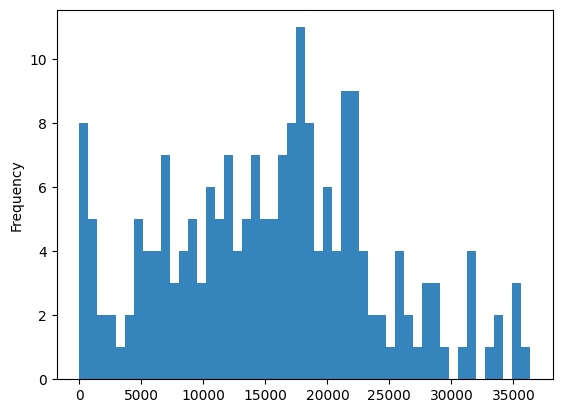

In [19]:
ax = df["Debt"].plot.hist(bins=50, alpha=0.9)

### 1c
For the non-mortgage debts, find the first ~~quartile~~quantile Q1 , the third ~~quartile~~quantile Q3, interquartile
range, the 95th percentile, and the percent rank of $10,000. Interpret these numbers to
describe the behaviors of these households in non-mortgage debts.

In [22]:
debt=df["Debt"]
q1=debt.quantile(q=0.25)
print("q1:",q1)
q2=debt.quantile(q=0.75)
print("q2:",q2)

q1: 9191.92988728025
q2: 21259.126938245026


### 1d

For the incomes, verify Chebyshev’s theorem for k = 1.5 and k = 2, where k is the number of
standard deviations from the mean.

Chebyshev’s theorem is Chebyshev's Inequality

In [46]:
def chebyshev_ineq(k:float):
    """
    find boundary of PDF
    """
    return 1-(1/k**2)
    
assert chebyshev_ineq(2) == 3/4 #unittest

def find_actual_el_num_in_range(series: pd.Series, k:float):
    std=series.std()
    mean=series.mean()
    upper=mean+k*std
    lower=mean-k*std
    # print(lower,upper)
    return series.between(lower, upper, inclusive="both").sum()

incomes = df["Income"]
k1p5_actual=find_actual_el_num_in_range(incomes, 1.5)
k1p5_bound=incomes.size*chebyshev_ineq(1.5)
print("k=1.5, actual:{} should >= chebyshev ineq bound:{}".format(k1p5_actual, k1p5_bound))
assert k1p5_actual>=k1p5_bound
assert find_actual_el_num_in_range(incomes, 2)>=incomes.size*chebyshev_ineq(2)

k=1.5, actual:174 should >= chebyshev ineq bound:111.11111111111111


### 1e
 For the incomes, calculate the estimations of proportions based on the empirical rule for one,
two, and three standard deviations. Are the estimations closed to the real proportions? Why?

[wiki 68–95–99.7法則](https://zh.wikipedia.org/zh-tw/68%E2%80%9395%E2%80%9399.7%E6%B3%95%E5%89%87)

In [58]:
#actual proportion
def proportion_of_std_range(series:pd.Series, k:float):
    return find_actual_el_num_in_range(incomes, k)/incomes.size
print("1 std portion, actual:{}, predict:0.68".format(proportion_of_std_range(incomes,1)))
print("2 std portion, actual:{}, predict:0.95".format(proportion_of_std_range(incomes,2)))
print("3 std portion, actual:{}, predict:0.997".format(proportion_of_std_range(incomes,3)))


1 std portion, actual:0.625, predict:0.68
2 std portion, actual:0.96, predict:0.95
3 std portion, actual:1.0, predict:0.997


### 1f
For the food expenditures, incomes, and non-mortgage debts, find the three correlation coef-
ficients of the three pairs. For each correlation coefficient, draw a corresponding scatter plot.
Make interpretation of these three pairs regarding their correlation.

            Food    Income      Debt
Food    1.000000  0.859343  0.023936
Income  0.859343  1.000000 -0.001989
Debt    0.023936 -0.001989  1.000000


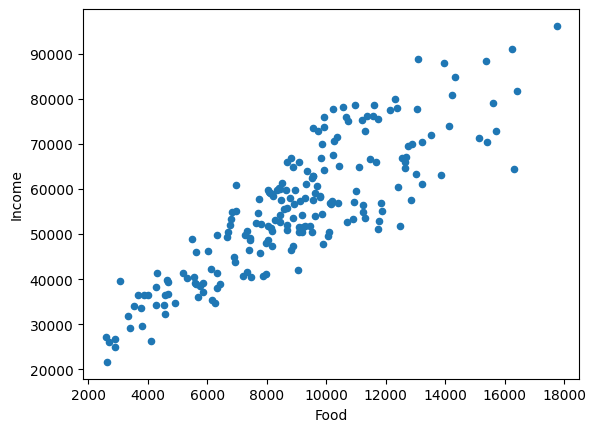

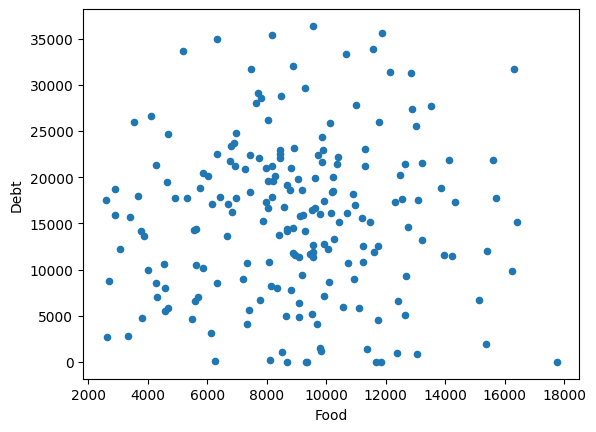

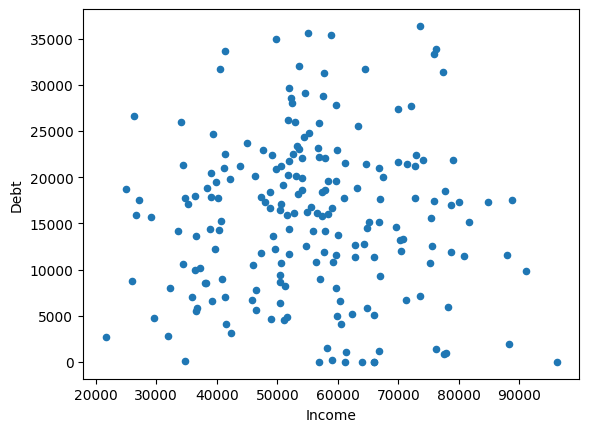

In [53]:
df_sub=df[["Food","Income","Debt"]]
corr_mat=df_sub.corr(method="pearson")
print(corr_mat)

ax1 = df.plot.scatter(x='Food',y='Income')
ax2 = df.plot.scatter(x='Food',y='Debt')
ax3 = df.plot.scatter(x='Income',y='Debt')